In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
from sklearn.linear_model import LinearRegression as lr
import statsmodels.api as sm

In [201]:
df_escolar_1 = pd.read_csv("dados_escolares_2019.csv", sep=',', encoding = 'cp1252')
df_escolar_2 = pd.read_csv("dados_escolares_2020.csv", sep=',', encoding = 'cp1252')
df_projeto_final = pd.read_csv("df_TESTE.csv", sep=';', encoding = 'utf-8')

In [202]:
df_escolar_1 = df_escolar_1[['Ano','UF','Código do Município','Nome do Município','Localização','Dependência Administrativa','Aprovacao_3_ano','Reprovacao_3_ano','Desistencia_3_ano']]
df_escolar_2 = df_escolar_2[['Ano','UF','Código do Município','Nome do Município','Localização','Dependência Administrativa','Aprovacao_3_ano_2020','Reprovacao_3_ano_2020','Desistencia_3_ano_2020']]
df_projeto_final_arquivo = df_projeto_final[['municipio', 'estado', 'codigo', 'Casos_per_capita', 'Mortes_per_capita','Relacao_casos_mes','Relacao_obitos_mes','diferenca']]

df_escolar_1 = df_escolar_1.loc[(df_escolar_1['Localização'] == 'Total') & (df_escolar_1['Dependência Administrativa'] == 'Total')]
df_escolar_2 = df_escolar_2.loc[(df_escolar_2['Localização'] == 'Total') & (df_escolar_2['Dependência Administrativa'] == 'Total')]

#print(df_escolar_1)
#df_escolar_1.to_csv('df_escolar_1_teste.csv', sep=';', index=False, encoding='cp1252')

df_escolar_1 = df_escolar_1[['Código do Município','Aprovacao_3_ano','Reprovacao_3_ano','Desistencia_3_ano']]
df_projeto_final_merge_1 = pd.merge(df_projeto_final_arquivo, df_escolar_1, left_on = ['codigo'], right_on= ['Código do Município'], how='left')

df_escolar_2 = df_escolar_2[['Código do Município','Aprovacao_3_ano_2020','Reprovacao_3_ano_2020','Desistencia_3_ano_2020']]
df_projeto_final_merge_2 = pd.merge(df_projeto_final_arquivo, df_escolar_2, left_on = ['codigo'], right_on= ['Código do Município'], how='left')

df_projeto_final_merge_2 = df_projeto_final_merge_2[['Código do Município','Aprovacao_3_ano_2020','Reprovacao_3_ano_2020','Desistencia_3_ano_2020']]
df_projeto_final = pd.merge(df_projeto_final_merge_1, df_projeto_final_merge_2, left_on = ['Código do Município'], right_on= ['Código do Município'], how='left')

#df_projeto_final.to_csv('df_teste_3.csv', sep=';', index=False, encoding='utf-8')

df_projeto_final = df_projeto_final.replace("--", np.nan)

df_projeto_final = df_projeto_final.dropna()

df_projeto_final['Aprovacao_3_ano'] = df_projeto_final['Aprovacao_3_ano'].str.replace(',', '.').astype(float)
df_projeto_final['Reprovacao_3_ano'] = df_projeto_final['Reprovacao_3_ano'].str.replace(',', '.').astype(float)
df_projeto_final['Desistencia_3_ano'] = df_projeto_final['Desistencia_3_ano'].str.replace(',', '.').astype(float)
df_projeto_final['Aprovacao_3_ano_2020'] = df_projeto_final['Aprovacao_3_ano_2020'].str.replace(',', '.').astype(float)
df_projeto_final['Reprovacao_3_ano_2020'] = df_projeto_final['Reprovacao_3_ano_2020'].str.replace(',', '.').astype(float)
df_projeto_final['Desistencia_3_ano_2020'] = df_projeto_final['Desistencia_3_ano_2020'].str.replace(',', '.').astype(float)

#df_projeto_final.to_csv('df_teste_3.csv', sep=';', index=False, encoding='utf-8')

df_projeto_final['Diferenca_aprovacao'] = df_projeto_final['Aprovacao_3_ano_2020'] - df_projeto_final['Aprovacao_3_ano']
df_projeto_final['Diferenca_reprovacao'] = df_projeto_final['Reprovacao_3_ano_2020'] - df_projeto_final['Reprovacao_3_ano']
df_projeto_final['Diferenca_desistencia'] = df_projeto_final['Desistencia_3_ano_2020'] - df_projeto_final['Desistencia_3_ano']

#df_projeto_final.to_csv('df_teste_3.csv', sep=';', index=False, encoding='utf-8')

df_projeto_final = df_projeto_final[['municipio', 'estado', 'codigo', 'Casos_per_capita', 'Mortes_per_capita','Relacao_casos_mes','Relacao_obitos_mes','Diferenca_aprovacao','Diferenca_reprovacao','Diferenca_desistencia','diferenca']]

df_projeto_final.to_csv('df_projeto_final_covid_e_escola.csv', sep=';', index=False, encoding='utf-8')

0.00023638530946046288


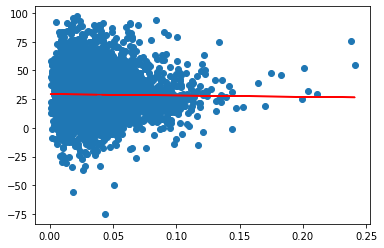

                            OLS Regression Results                            
Dep. Variable:              diferenca   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.190
Date:                Mon, 20 Jun 2022   Prob (F-statistic):              0.275
Time:                        20:10:46   Log-Likelihood:                -21659.
No. Observations:                5034   AIC:                         4.332e+04
Df Residuals:                    5032   BIC:                         4.333e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               29.3747      0.457  

In [203]:
X = df_projeto_final['Casos_per_capita'].values.reshape(-1, 1)
Y = df_projeto_final['diferenca'].values.reshape(-1, 1)
linear_regressor = lr()
reg = linear_regressor.fit(X, Y)
print(reg.score(X, Y))
Y_p = linear_regressor.predict(X)

plot.scatter(X, Y)
plot.plot(X, Y_p, color='red')
plot.show()

X = df_projeto_final['Casos_per_capita']
Y = df_projeto_final['diferenca']

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
print_model = model.summary()
print(print_model)

2.4499695777446817e-05


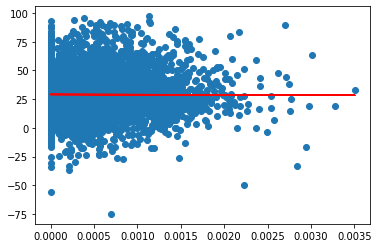

                            OLS Regression Results                            
Dep. Variable:              diferenca   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.1233
Date:                Mon, 20 Jun 2022   Prob (F-statistic):              0.726
Time:                        20:10:47   Log-Likelihood:                -21659.
No. Observations:                5034   AIC:                         4.332e+04
Df Residuals:                    5032   BIC:                         4.334e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                29.0850      0.43

In [204]:
X = df_projeto_final['Mortes_per_capita'].values.reshape(-1, 1)
Y = df_projeto_final['diferenca'].values.reshape(-1, 1)
linear_regressor = lr()
reg = linear_regressor.fit(X, Y)
print(reg.score(X, Y))
Y_p = linear_regressor.predict(X)

plot.scatter(X, Y)
plot.plot(X, Y_p, color='red')
plot.show()

X = df_projeto_final['Mortes_per_capita']
Y = df_projeto_final['diferenca']

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
print_model = model.summary()
print(print_model)

0.0037062042895756875


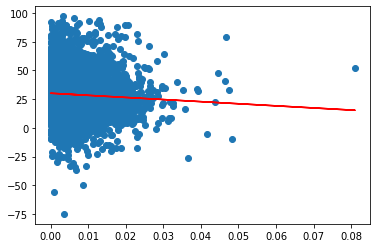

                            OLS Regression Results                            
Dep. Variable:              diferenca   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     18.72
Date:                Mon, 20 Jun 2022   Prob (F-statistic):           1.54e-05
Time:                        20:10:48   Log-Likelihood:                -21650.
No. Observations:                5034   AIC:                         4.330e+04
Df Residuals:                    5032   BIC:                         4.332e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                30.1525      0.37

In [205]:
X = df_projeto_final['Relacao_casos_mes'].values.reshape(-1, 1)
Y = df_projeto_final['diferenca'].values.reshape(-1, 1)
linear_regressor = lr()
reg = linear_regressor.fit(X, Y)
print(reg.score(X, Y))
Y_p = linear_regressor.predict(X)

plot.scatter(X, Y)
plot.plot(X, Y_p, color='red')
plot.show()

X = df_projeto_final['Relacao_casos_mes']
Y = df_projeto_final['diferenca']

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
print_model = model.summary()
print(print_model)

0.00036712635579772


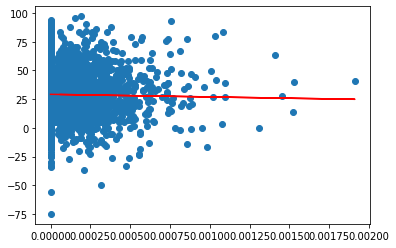

                            OLS Regression Results                            
Dep. Variable:              diferenca   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.848
Date:                Mon, 20 Jun 2022   Prob (F-statistic):              0.174
Time:                        20:10:48   Log-Likelihood:                -21658.
No. Observations:                5034   AIC:                         4.332e+04
Df Residuals:                    5032   BIC:                         4.333e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 29.1924      0

In [206]:
X = df_projeto_final['Relacao_obitos_mes'].values.reshape(-1, 1)
Y = df_projeto_final['diferenca'].values.reshape(-1, 1)
linear_regressor = lr()
reg = linear_regressor.fit(X, Y)
print(reg.score(X, Y))
Y_p = linear_regressor.predict(X)

plot.scatter(X, Y)
plot.plot(X, Y_p, color='red')
plot.show()

X = df_projeto_final['Relacao_obitos_mes']
Y = df_projeto_final['diferenca']

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
print_model = model.summary()
print(print_model)

0.0005280872595773145


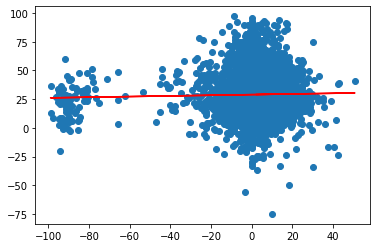

                            OLS Regression Results                            
Dep. Variable:              diferenca   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.659
Date:                Mon, 20 Jun 2022   Prob (F-statistic):              0.103
Time:                        20:10:48   Log-Likelihood:                -21658.
No. Observations:                5034   AIC:                         4.332e+04
Df Residuals:                    5032   BIC:                         4.333e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  28.9489    

In [207]:
X = df_projeto_final['Diferenca_aprovacao'].values.reshape(-1, 1)
Y = df_projeto_final['diferenca'].values.reshape(-1, 1)
linear_regressor = lr()
reg = linear_regressor.fit(X, Y)
print(reg.score(X, Y))
Y_p = linear_regressor.predict(X)

plot.scatter(X, Y)
plot.plot(X, Y_p, color='red')
plot.show()

X = df_projeto_final['Diferenca_aprovacao']
Y = df_projeto_final['diferenca']

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
print_model = model.summary()
print(print_model)

0.0031281465299664024


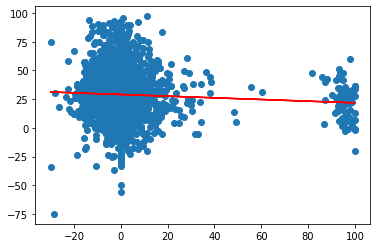

                            OLS Regression Results                            
Dep. Variable:              diferenca   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     15.79
Date:                Mon, 20 Jun 2022   Prob (F-statistic):           7.18e-05
Time:                        20:10:48   Log-Likelihood:                -21652.
No. Observations:                5034   AIC:                         4.331e+04
Df Residuals:                    5032   BIC:                         4.332e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    29.04

In [208]:
X = df_projeto_final['Diferenca_desistencia'].values.reshape(-1, 1)
Y = df_projeto_final['diferenca'].values.reshape(-1, 1)
linear_regressor = lr()
reg = linear_regressor.fit(X, Y)
print(reg.score(X, Y))
Y_p = linear_regressor.predict(X)

plot.scatter(X, Y)
plot.plot(X, Y_p, color='red')
plot.show()

X = df_projeto_final['Diferenca_desistencia']
Y = df_projeto_final['diferenca']

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
print_model = model.summary()
print(print_model)

0.00496681546698019


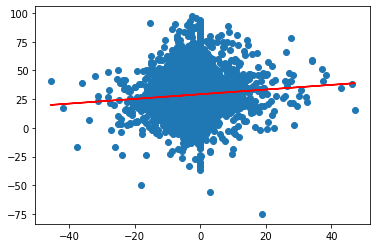

                            OLS Regression Results                            
Dep. Variable:              diferenca   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     25.12
Date:                Mon, 20 Jun 2022   Prob (F-statistic):           5.58e-07
Time:                        20:10:49   Log-Likelihood:                -21647.
No. Observations:                5034   AIC:                         4.330e+04
Df Residuals:                    5032   BIC:                         4.331e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   29.2818 

In [209]:
X = df_projeto_final['Diferenca_reprovacao'].values.reshape(-1, 1)
Y = df_projeto_final['diferenca'].values.reshape(-1, 1)
linear_regressor = lr()
reg = linear_regressor.fit(X, Y)
print(reg.score(X, Y))
Y_p = linear_regressor.predict(X)

plot.scatter(X, Y)
plot.plot(X, Y_p, color='red')
plot.show()

X = df_projeto_final['Diferenca_reprovacao']
Y = df_projeto_final['diferenca']

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
print_model = model.summary()
print(print_model)

In [210]:
df_x_low = df_projeto_final['Diferenca_aprovacao'].quantile(0.02)
df_x_hi  = df_projeto_final['Diferenca_aprovacao'].quantile(0.99)
df_projeto_final = df_projeto_final[(df_projeto_final['Diferenca_aprovacao'] < df_x_hi) & (df_projeto_final['Diferenca_aprovacao'] > df_x_low)]

<AxesSubplot:ylabel='Frequency'>

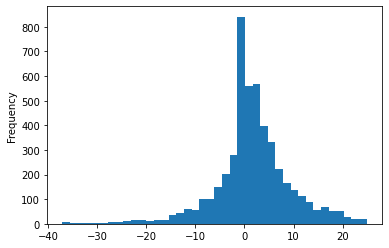

In [211]:
df_projeto_final["Diferenca_aprovacao"].plot.hist(bins=40)

<AxesSubplot:ylabel='Frequency'>

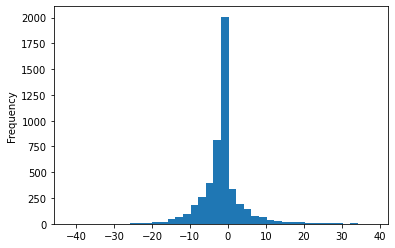

In [212]:
df_projeto_final["Diferenca_reprovacao"].plot.hist(bins=40)

<AxesSubplot:ylabel='Frequency'>

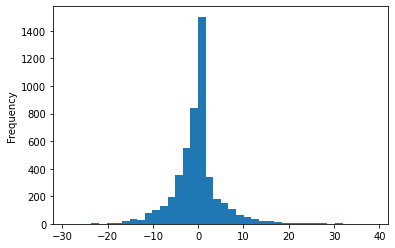

In [213]:
df_projeto_final["Diferenca_desistencia"].plot.hist(bins=40)